In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pyspark
import findspark
from pyspark import SparkContext
from pyspark.sql import *
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import count
from pyspark.sql.functions import sum
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('C:\\oldjunk.txt')

In [8]:
##### Date Conversions

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['year'] = pd.DatetimeIndex(df['Date']).year
conditions =[
    (df['month']==1 )| (df['month']==12)| (df['month']==2),
    (df['month']==3) | (df['month']==4) | ( df['month']==5),
    (df['month']==6) | (df['month']==7) | (df['month']==8),
    (df['month']==9)|(df['month']==10)| (df['month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

#### MULTINOMIAL LABEL ENCODING

In [11]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [12]:
df1 = MultiColumnLabelEncoder(columns = ['State','Region','City','Category','Subcategory','MarketingPromotion','month','Season','year']).fit_transform(df)

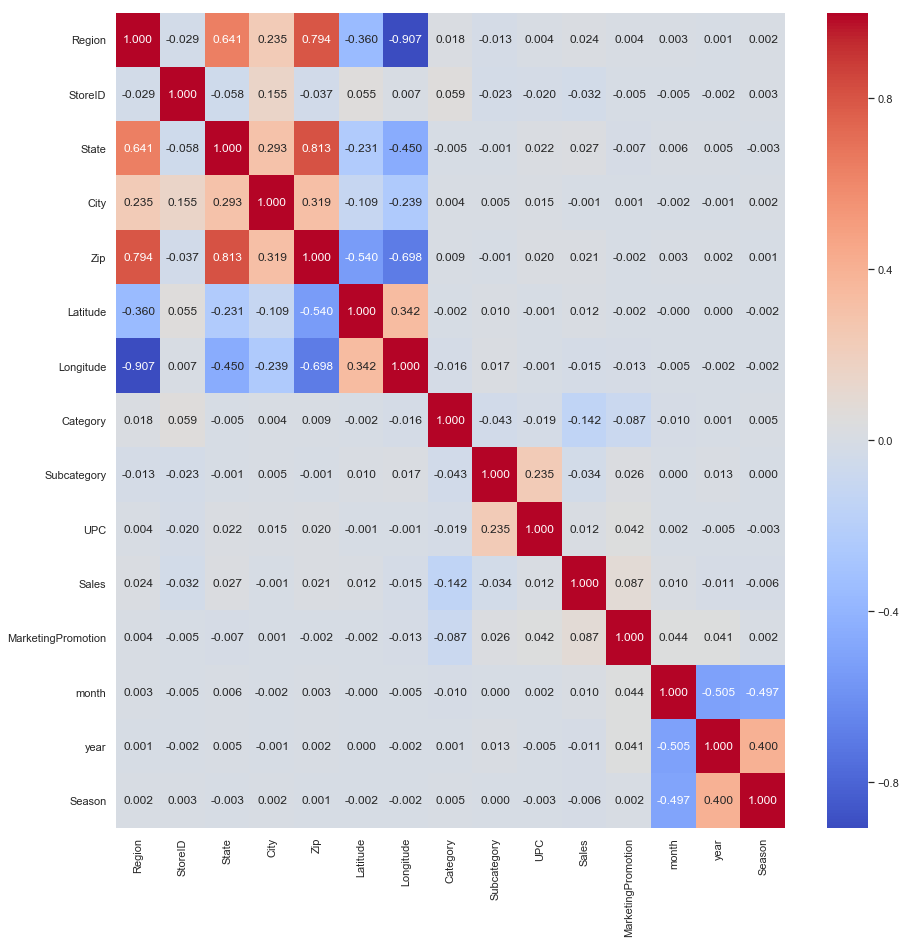

In [13]:
sb.set(style='white',palette='muted',color_codes=True)
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(df1.corr(),annot=True,fmt='.3f',cmap='coolwarm',ax=ax)
plt.savefig('heatmap.jpg')#you can use 'Blues,coolwarm, Greens,BuPu, YlGnBu' to control the color